# ![.right](https://lh6.ggpht.com/wUrTIhpHPVqw_VPCdhbSiF5TXlBlLyRHdH1gsII_y5NkgYKzbbj7cC2l6AGoVq-JN0U=w100 "MSDS 7331 Data Mining - Project 1")


# Project 3: BEER ME! 

### a recommendation system for those who are thirsty but don't know it yet

---



# Team Members

- Chris Woodard
- Claire Chu
- Nathan Mowat
- Bill Kerneckel

---


# Rubic

- [Business Understanding](#dp1) 

- [Data Understanding 1](#dp2)

- [Data Understanding 2](#me1)

- [Modeling and Evaluation 1](#me2)

- [Modeling and Evaluation 2](#me3)

- [Modeling and Evaluation 3](#me4)

- [Modeling and Evaluation 4](#me5)

- [Deployment](#d)

- [Exceptional Work](#ew)

- [Appendix](#a)

<hr>



# OBJECTIVE: 
We found a comprehensive list of beer reviews from beeradvocate and ratebeer. We want to use these reviews to generate a recommendation system that will suggest potential beers that a user might like based on their previous beer ratings and reviews:
- Establish a solid distance metric to determine the similiarity amongst different users
- Utilize this metric to recommend other beers that a user might like

We hope that the collaborative filtering on a custom recommendation system completed in this notebook will help make beer drinkers thirsty for beers they have not tried yet.

source: https://data.world/socialmediadata/beeradvocate

source: http://nbviewer.jupyter.org/gist/glamp/20a18d52c539b87de2af

source: https://snap.stanford.edu/data/web-BeerAdvocate.html

source: https://github.com/yhat/Beer-Rec-Flask/blob/master/README.md

# Business Understanding

---

<span style="color:red">10 Points - Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?</span>

This data was collected from Beeradvocate.com and ratebeer.com from January 1998 - November 2011. Both websites are used by beer drinkers to not only stay informed about the latest in beer news, but to also track and review the beers each user has tried. As an avid beer drinker myself, these websites are useful to me in that they help me avoid re-ordering beers i've previously tried and did not like. This helps me save money and stomach space when i'm ordering drinks at the bar. 

The dataset we are analyzing has a total of 13 columns including: 

-brewery Id
-brewery name
-review time
-overall review rating
-review of aroma
-review of appears
-username of reviewer
-beer style
-review palate
-review taste
-beer name
-alcohol percentage by volume
-beer ID

A good algorithm will be able to suggest a beer that the user will drink and rate at least a 4 or above in their overall rating (we chose 4 because this is the median review rating). If a user reviews the suggested beer at less than 4, our recommender system is not effective. 

## need help here: Statistically, we will use a ....

# Data Understanding

---

<span style="color:red"> 10 Points - Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?</span>

Insert content here!.......

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#load python libaries
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as pl
import seaborn as sns
import glob
import sys
import os
import warnings
import ggplot
import datetime
import time
from datetime import date

In [2]:
%matplotlib inline

In [3]:
#load data file
beerDF = pd.read_csv('beer_reviews.csv') 

#you'll have to change the file path to your working directory


In [5]:
beerDF.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
summary = beerDF.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3.130099e+03,5.578104e+03,1.000000e+00,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586614.0,1.224089e+09,7.654427e+07,8.406720e+08,1.173224e+09,1.239203e+09,1.288568e+09,1.326285e+09
review_overall,1586614.0,3.815581e+00,7.206219e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586614.0,3.735636e+00,6.976167e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586614.0,3.841642e+00,6.160928e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586614.0,3.743701e+00,6.822184e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586614.0,3.792860e+00,7.319696e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_abv,1518829.0,7.042387e+00,2.322526e+00,1.000000e-02,5.200000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerid,1586614.0,2.171279e+04,2.181834e+04,3.000000e+00,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


In [7]:
#what is the most popular beer?
beerDF.beer_name.describe()

count           1586614
unique            56857
top       90 Minute IPA
freq               3290
Name: beer_name, dtype: object

In [75]:
#what are the top 10 most popular beers?
from collections import Counter
topbeer = Counter(beerDF.beer_name)
topbeer.most_common(10)

[('90 Minute IPA', 3290),
 ('India Pale Ale', 3130),
 ('Old Rasputin Russian Imperial Stout', 3111),
 ('Sierra Nevada Celebration Ale', 3000),
 ('Two Hearted Ale', 2728),
 ('Stone Ruination IPA', 2704),
 ('Arrogant Bastard Ale', 2704),
 ('Sierra Nevada Pale Ale', 2587),
 ('Stone IPA (India Pale Ale)', 2575),
 ('Pliny The Elder', 2527)]

In [52]:
#which reviewer has the most reviews?

toprevs = Counter(beerDF.review_profilename)
toprevs.most_common(10)

[('northyorksammy', 5817),
 ('BuckeyeNation', 4661),
 ('mikesgroove', 4617),
 ('Thorpe429', 3518),
 ('womencantsail', 3497),
 ('NeroFiddled', 3488),
 ('ChainGangGuy', 3471),
 ('brentk56', 3357),
 ('Phyl21ca', 3179),
 ('WesWes', 3168)]

In [55]:
#investigate any NA
beerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [64]:
beerDF.brewery_name.isnull().sum().sum()

15

In [68]:
beerDF.review_profilename.isnull().sum().sum()

348

In [67]:
beerDF.beer_abv.isnull().sum().sum()

67785

Since the majority of our null values are in the "beer_abv" column let's drop this column. If this recommendation system were to go into full scale production, we could replace the null values with the median abv of each style of beer. But, since we are limited in time and computing power, we will delete this column for now.

As our next highest amount of null values comes from the "review_profilename" column, we will need to delete the rows with no profilename. Filling all null with the same entry would result in a faulty statistic result since each null entry was probably entered by different users. Since we want to try collaborative filtering based on user preferences, we will assume that a "null" entry in the profilename space is not useful. It seems like our best bet would be to delete these entries.

The column with the lowest number of null values is the "brewery_name" column. 

In [70]:
beerDF.drop('beer_abv', axis=1, inplace=True)
beerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 12 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_beerid           1586614 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 145.3+ MB


In [71]:
beerDF2 = beerDF[beerDF.review_profilename.notnull()]
beerDF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586266 entries, 0 to 1586613
Data columns (total 12 columns):
brewery_id            1586266 non-null int64
brewery_name          1586251 non-null object
review_time           1586266 non-null int64
review_overall        1586266 non-null float64
review_aroma          1586266 non-null float64
review_appearance     1586266 non-null float64
review_profilename    1586266 non-null object
beer_style            1586266 non-null object
review_palate         1586266 non-null float64
review_taste          1586266 non-null float64
beer_name             1586266 non-null object
beer_beerid           1586266 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 157.3+ MB


In [72]:
beerDF3 = beerDF2[beerDF2.brewery_name.notnull()]
beerDF3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586251 entries, 0 to 1586613
Data columns (total 12 columns):
brewery_id            1586251 non-null int64
brewery_name          1586251 non-null object
review_time           1586251 non-null int64
review_overall        1586251 non-null float64
review_aroma          1586251 non-null float64
review_appearance     1586251 non-null float64
review_profilename    1586251 non-null object
beer_style            1586251 non-null object
review_palate         1586251 non-null float64
review_taste          1586251 non-null float64
beer_name             1586251 non-null object
beer_beerid           1586251 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 157.3+ MB


In [73]:
#review our new dataset without any null values
summary3 = beerDF3.describe()
summary3 = summary3.transpose()
summary3

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586251.0,3.130381e+03,5.578478e+03,1.0,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586251.0,1.224100e+09,7.654413e+07,840672001.0,1.173236e+09,1.239222e+09,1.288572e+09,1.326285e+09
review_overall,1586251.0,3.815632e+00,7.205920e-01,0.0,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586251.0,3.735688e+00,6.975649e-01,1.0,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586251.0,3.841677e+00,6.160621e-01,0.0,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586251.0,3.743757e+00,6.821700e-01,1.0,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586251.0,3.792925e+00,7.319083e-01,1.0,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_beerid,1586251.0,2.171468e+04,2.181901e+04,3.0,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


After reviewing the dataset, we can see that there are a total of 1586251 complete rows of data comprised of 12 total columns. 

-brewery Id: numeric value representing brewery name, type int64 but nominal in nature
-brewery name: string representing brewery name, type object 
-review time: numeric timestamp repesenting time and date review was completed, type int 64 but with timescale
-overall review rating: categorical from 1-5 representing overall rating, type float64 
-review of aroma: categorical from 1-5 representing aroma rating, type float64 
-review of appearance: categorical from 1-5 representing appearance rating, type float64 
-username of reviewer: string representing user name, type object
-beer style: string representing style of beer, type object
-review palate: categorical from 1-5 representing mouthfeel rating, type float64 
-review taste: categorical from 1-5 representing taste rating, type float64 
-beer name: string representing name of beer given by brewery, type object
-beer ID: numeric value representing beer name, type int 64 but nominal in nature

Data quality was verified with the original dataset having 1586614 values including null. After removing the ABV column and eliminating rows with null values, we have 1586251 total rows and 12 columns.

Looking at the summary of the data, it does not appear that there are any duplicates for the data as the system does not allow users to rate a beer more than once. We can see that the average overall review rating was 3.8. As mentioned earlier, we will round this value up to 4 and use this as our benchmark value to determine if our recommendation system is working. (After completing a review, suggested beers should be rated by the viewer at least 4 or higher)

source: https://www.beeradvocate.com/community/threads/how-to-review-a-beer.241156/

# is there suposed to be a break here?

## Extracting Reviews

In [76]:
#convert name of dataset from beerdf3 to beerdf
beerDF = beerDF3.copy()

In [77]:
beer_1, beer_2 = "90 Minute IPA", "India Pale Ale"

def get_beer_reviews(beer, common_users):
    mask = (beerDF.review_profilename.isin(common_users)) & (beerDF.beer_name==beer)
    reviews = beerDF[mask].sort('review_profilename')
    reviews = reviews[reviews.review_profilename.duplicated()==False]
    return reviews
beer_1_reviews = get_beer_reviews(beer_1, common_reviewers)
beer_2_reviews = get_beer_reviews(beer_2, common_reviewers)

cols = ['beer_name', 'review_profilename', 'review_overall', 'review_aroma', 'review_palate', 'review_taste']
beer_2_reviews[cols].head()

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,beer_name,review_profilename,review_overall,review_aroma,review_palate,review_taste
595646,India Pale Ale,1fastz28,3.5,4.0,3.5,3.0
212302,India Pale Ale,49degrees,3.5,3.0,3.0,3.5
1348197,India Pale Ale,99bottles,4.5,4.0,4.0,4.5
1406683,India Pale Ale,9InchNails,3.5,3.5,4.0,3.5
595971,India Pale Ale,ADR,4.0,3.5,3.5,3.0


## Calculate Euclidean Distances

In [78]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from scipy.stats.stats import pearsonr


ALL_FEATURES = ['review_overall', 'review_aroma', 'review_palate', 'review_taste']
def calculate_similarity(beer1, beer2):
    # find common reviewers
    beer_1_reviewers = beerDF[beerDF.beer_name==beer1].review_profilename.unique()
    beer_2_reviewers = beerDF[beerDF.beer_name==beer2].review_profilename.unique()
    common_reviewers = set(beer_1_reviewers).intersection(beer_2_reviewers)

    # get reviews
    beer_1_reviews = get_beer_reviews(beer1, common_reviewers)
    beer_2_reviews = get_beer_reviews(beer2, common_reviewers)
    dists = []
    for f in ALL_FEATURES:
        dists.append(euclidean_distances(beer_1_reviews[f], beer_2_reviews[f])[0][0])
    
    return dists

calculate_similarity(beer_1, beer_2)

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
//anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either

[27.308423608842748, 27.37243138634199, 26.177280225416848, 29.828677476549309]

## Calculate the Similarity of a Set of Beers

In [13]:
# calculate only a subset for the demo
beers = ["Dale's Pale Ale", "Sierra Nevada Pale Ale", "Michelob Ultra",
         "Natural Light", "Bud Light", "Fat Tire Amber Ale", "Coors Light",
         "Blue Moon Belgian White", "60 Minute IPA", "Guinness Draught"]

# calculate everything for real production
# beers = df.beer_name.unique()

simple_distances = []
for beer1 in beers:
    print ("starting", beer1)
    for beer2 in beers:
        if beer1 != beer2:
            row = [beer1, beer2] + calculate_similarity(beer1, beer2)
            simple_distances.append(row)

starting Dale's Pale Ale
starting Sierra Nevada Pale Ale
starting Michelob Ultra
starting Natural Light
starting Bud Light
starting Fat Tire Amber Ale
starting Coors Light
starting Blue Moon Belgian White
starting 60 Minute IPA
starting Guinness Draught


## Inspect the Results

In [14]:
cols = ["beer1", "beer2", "overall_dist", "aroma_dist", "palate_dist", "taste_dist"]
simple_distances = pd.DataFrame(simple_distances, columns=cols)
simple_distances.tail()

,beer1,beer2,overall_dist,aroma_dist,palate_dist,taste_dist
85,Guinness Draught,Bud Light,43.854874,42.388088,45.694639,44.516851
86,Guinness Draught,Fat Tire Amber Ale,23.611438,21.095023,24.591665,22.632941
87,Guinness Draught,Coors Light,41.249242,38.337319,43.182751,40.416581
88,Guinness Draught,Blue Moon Belgian White,27.285527,22.169799,25.475478,23.780244
89,Guinness Draught,60 Minute IPA,31.200962,32.638168,32.190837,34.452866


## Allow Users to Customize the Weights

In [15]:
def calc_distance(dists, beer1, beer2, weights):
    mask = (dists.beer1==beer1) & (dists.beer2==beer2)
    row = dists[mask]
    row = row[['overall_dist', 'aroma_dist', 'palate_dist', 'taste_dist']]
    dist = weights * row
    return dist.sum(axis=1).tolist()[0]

weights = [2, 1, 1, 1] #Give your ratings here
print (calc_distance(simple_distances, "Fat Tire Amber Ale", "Dale's Pale Ale", weights))
print (calc_distance(simple_distances, "Fat Tire Amber Ale", "Michelob Ultra", weights))

86.40810158004888
153.0152903071523


## Recommend beers similar to ______________

In [16]:
my_beer = "60 Minute IPA"
results = []
for b in beers:
    if my_beer!=b:
        results.append((my_beer, b, calc_distance(simple_distances, my_beer, b, weights)))
sorted(results, key=lambda x: x[2])

[('60 Minute IPA', "Dale's Pale Ale", 86.14915895628911),
 ('60 Minute IPA', 'Sierra Nevada Pale Ale', 104.27352244928987),
 ('60 Minute IPA', 'Fat Tire Amber Ale', 113.30339542932701),
 ('60 Minute IPA', 'Blue Moon Belgian White', 131.96909004478798),
 ('60 Minute IPA', 'Guinness Draught', 161.68379444757014),
 ('60 Minute IPA', 'Natural Light', 168.19551166662126),
 ('60 Minute IPA', 'Michelob Ultra', 200.38047100332074),
 ('60 Minute IPA', 'Coors Light', 233.12536459010371),
 ('60 Minute IPA', 'Bud Light', 262.58747519219816)]

# Data Understanding 2

----


<span style="color:red">10 Points - Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.</span>

In [81]:
pd.crosstab(index=beerDF["review_overall"],columns="count") 

col_0,count
review_overall,
0.0,7
1.0,10954
1.5,12972
2.0,38206
2.5,58485
3.0,165582
3.5,301743
4.0,582683
4.5,324321


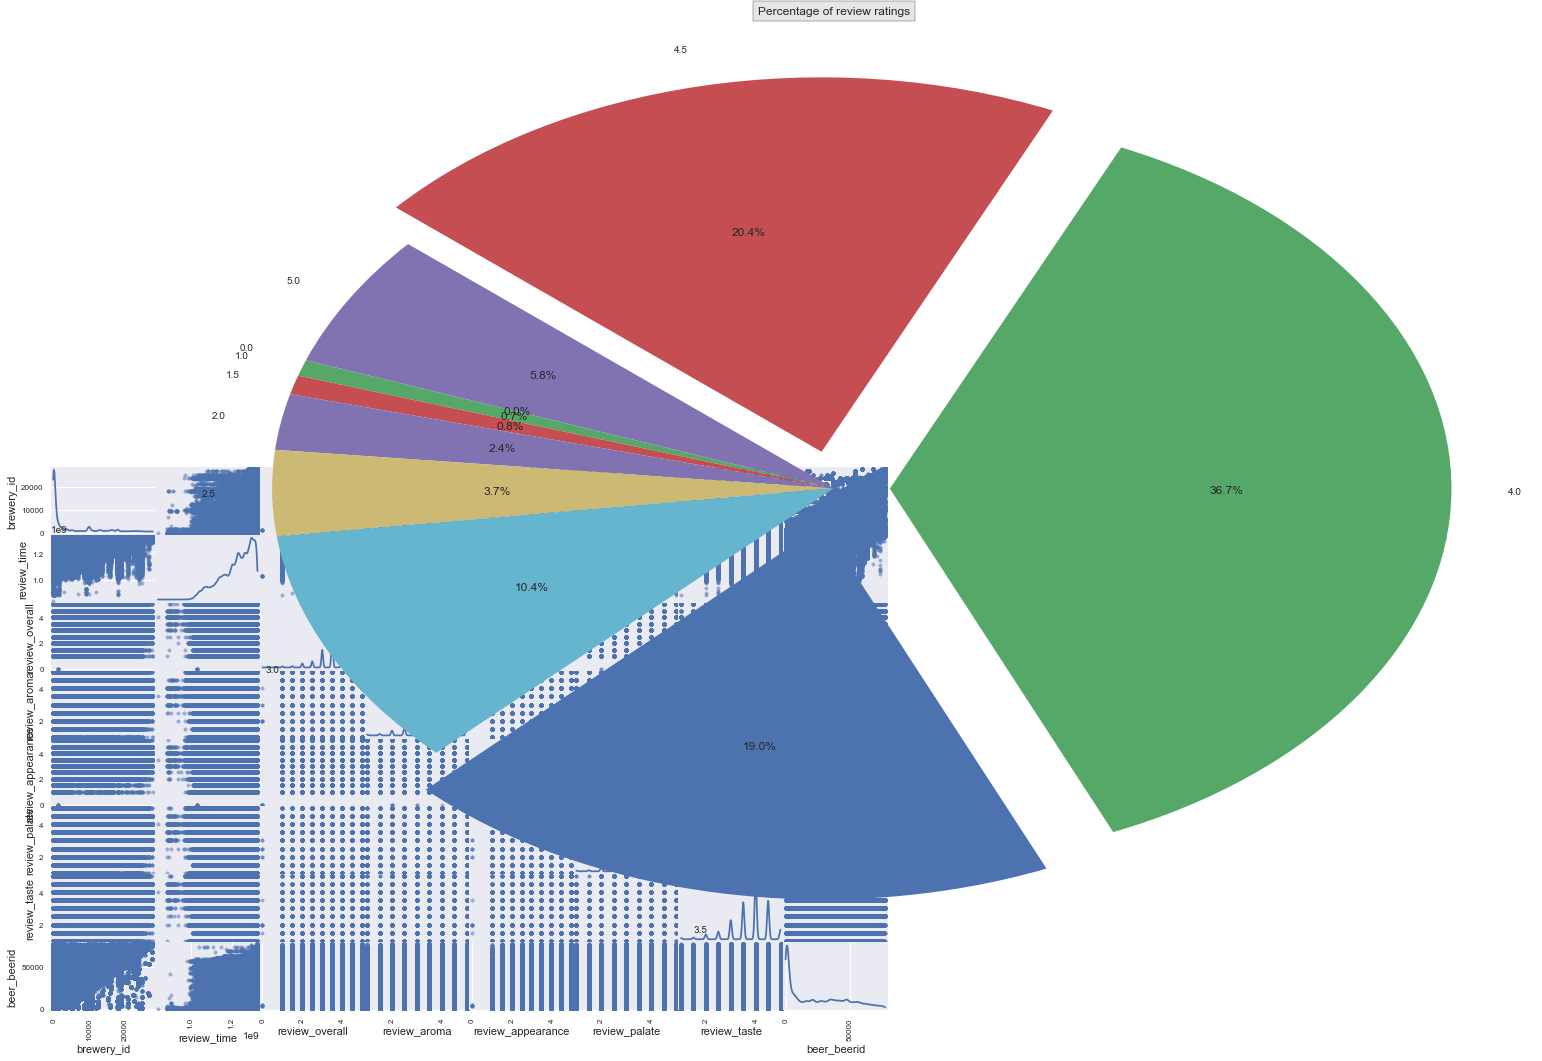

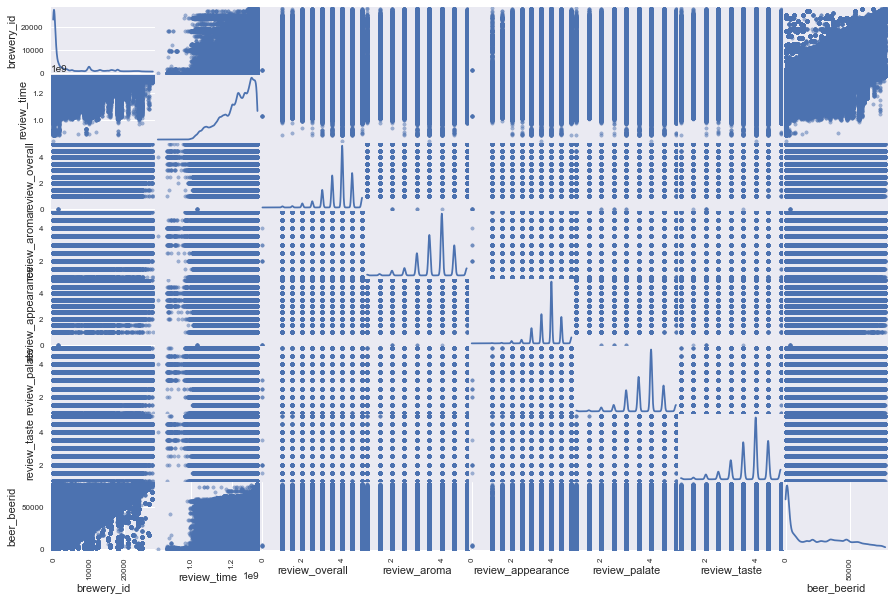

In [83]:
# percentage of each review rating
from pylab import *
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 1.3, 1.3])

# The slices will be ordered and plotted counter-clockwise.
labels = '0.0','1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0'
fracs = [7, 10954, 12972, 38206, 58485, 165582, 301743, 582683, 324321, 91298]
explode = [0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0]

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=160)

title('Percentage of review ratings', bbox={'facecolor':'0.9', 'pad':5})

show()

#ummmm does this graph look funny for anyone else?

In [84]:
#plot the top ten reviewers by number of reviews
s = pd.Series(np.random.choice(list(string.uppercase), 1000))
counts = beerDF.review_profilename.value_counts()
ax = counts.iloc[:10].plot(kind="barh")
ax.invert_yaxis()

#source: http://stackoverflow.com/questions/28022227/sorted-bar-charts-with-pandas-matplotlib-or-seaborn

NameError: name 'string' is not defined

In [ ]:
#some more graphs and pretty pictures?

# Modeling and Evaluation 1
---

<span style="color:red">10 Points - Train and adjust parameters</span>

## i'm not sure that this is the place for this information here?! i was thinking to copy the "extract reviews", "calculating distance", "calculate simliarity" , etc. here?

### wrap in yhat

In [ ]:
from yhat import Yhat, BaseModel

class BeerRec(BaseModel):
    
    def transform(self, raw_data):
        beer = raw_data['beer']
        weights = raw_data.get("weights", [1, 1, 1, 1])
        # normalize the weights so they sum to 1.0
        weights = [float(w) / sum(weights) for w in weights]
        return (beer, weights)
        
    def predict(self, data):
        beer, weights = data
        results = []
        for beer_cmp in self.beers:
            if beer!=beer_cmp:
                dist = calc_distance(self.simple_distances, beer, beer_cmp, weights)
                results.append((beer, beer_cmp, dist))
        return sorted(results, key=lambda x: x[2])

### deploy in yhat

In [ ]:
yh = Yhat("{USERNAME}", "{APIKEY}")
br = BeerRec(simple_distances=simple_distances, beers=beers,
             udfs=[calc_distance])
yh.deploy("PydataBeerRec", br)

### Test it out

In [ ]:
yh.predict("PydataBeerRec", 1, {"beer": "Coors Light", "weights": [1, 1, 1, 1]})

In [ ]:
yh.predict("PydataBeerRec", 1, {"beer": "Coors Light", "weights": [2, 1, 0, 0]})

# Modeling and Evaluation 2 - MUST USE PYTHON 2 KERNAL
---

<span style="color:red">10 Points - Evaluate and Compare</span>

Insert Content Here....

In [6]:
# This is a well known graphlab example that builds a recommendation system in 5 lines of code

import graphlab as gl

data = gl.SFrame.read_csv("beer_reviews.csv", 
                          column_type_hints={"review_overall":int})
data = data.dropna()
model = gl.recommender.create(data, user_id="review_profilename", item_id="beer_name", target="review_overall")
results = model.recommend(users=None, k=5)
model.save("my_model")

results.head() # the recommendation output

Finished parsing file C:\Users\natha_000\beer_reviews.csv

Parsing completed. Parsed 100 lines in 0.538085 secs.

Read 453422 lines. Lines per second: 675988

Finished parsing file C:\Users\natha_000\beer_reviews.csv

Parsing completed. Parsed 1586614 lines in 1.58794 secs.

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1518829 observations with 32909 users and 44085 items.

Data prepared in: 2.67022s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 189853 / 1518829 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | Not Viable                               |

| 3       | 0.0651042         | Not Viable                               |

| 4       | 0.016276          | Not Viable                               |

| 5       | 0.00406901        | 0.918259                                 |

| 6       | 0.00203451        | 0.723926                                 |

| 7       | 0.00101725        | Not Viable                               |

| 8       | 0.000254313       | No Decrease (5.15612 >= 1.10629)         |

| 9       | 6.35783e-005      | No Decrease (1.47439 >= 1.10629)         |

+---------+-------------------+------------------------------------------+

| Final   | 0.00203451        | 0.723926                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.10499           | 0.750749              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 3.73s        | DIVERGED          | DIVERGED              | 0.00203451  |

| RESET   | 5.05s        | 1.10451           | 0.750465              |             |

| 1       | 8.43s        | 1.48636           | 0.898845              | 0.00101725  |

| 2       | 11.49s       | 0.884881          | 0.651847              | 0.00101725  |

| 3       | 14.40s       | 0.822042          | 0.621869              | 0.00101725  |

| 4       | 17.36s       | 0.783384          | 0.603489              | 0.00101725  |

| 5       | 20.26s       | 0.759651          | 0.591493              | 0.00101725  |

| 6       | 23.24s       | 0.743838          | 0.583359              | 0.00101725  |

| 7       | 26.17s       | 0.731626          | 0.578127              | 0.00101725  |

| 8       | 29.13s       | 0.722078          | 0.573644              | 0.00101725  |

| 9       | 32.06s       | 0.714668          | 0.570286              | 0.00101725  |

| 10      | 34.97s       | 0.708404          | 0.56726               | 0.00101725  |

| 11      | 37.87s       | 0.702634          | 0.565193              | 0.00101725  |

| 12      | 40.82s       | 0.698945          | 0.562399              | 0.00101725  |

| 13      | 43.73s       | 0.693947          | 0.560955              | 0.00101725  |

| 14      | 46.68s       | 0.690424          | 0.558734              | 0.00101725  |

| 15      | 49.56s       | 0.686848          | 0.557266              | 0.00101725  |

| 16      | 52.50s       | 0.683934          | 0.555332              | 0.00101725  |

| 17      | 55.40s       | 0.681188          | 0.553352              | 0.00101725  |

| 18      | 58.35s       | 0.678741          | 0.552037              | 0.00101725  |

| 19      | 1m 1s        | 0.676841          | 0.550023              | 0.00101725  |

| 20      | 1m 4s        | 0.675543          | 0.547802              | 0.00101725  |

| 21      | 1m 7s        | 0.675153          | 0.54611               | 0.00101725  |

| 22      | 1m 10s       | 0.676723          | 0.543926              | 0.00101725  |

| 23      | 1m 12s       | 0.682922          | 0.542136              | 0.00101725  |

| 24      | 1m 15s       | 0.698577          | 0.543219              | 0.00101725  |

| 25      | 1m 18s       | 0.718787          | 0.549456              | 0.00101725  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.693922

Final training RMSE: 0.547408

recommendations finished on 1000/32909 queries. users per second: 1089.88

recommendations finished on 2000/32909 queries. users per second: 1069.39

recommendations finished on 3000/32909 queries. users per second: 1070.71

recommendations finished on 4000/32909 queries. users per second: 1075.27

recommendations finished on 5000/32909 queries. users per second: 1079.77

recommendations finished on 6000/32909 queries. users per second: 1082.8

recommendations finished on 7000/32909 queries. users per second: 1084.55

recommendations finished on 8000/32909 queries. users per second: 1086.16

recommendations finished on 9000/32909 queries. users per second: 1084.92

recommendations finished on 10000/32909 queries. users per second: 1086.47

recommendations finished on 11000/32909 queries. users per second: 1088.81

recommendations finished on 12000/32909 queries. users per second: 1090.43

recommendations finished on 13000/32909 queries. users per second: 1092.49

recommendations finished on 14000/32909 queries. users per second: 1093.58

recommendations finished on 15000/32909 queries. users per second: 1093.41

recommendations finished on 16000/32909 queries. users per second: 1091.42

recommendations finished on 17000/32909 queries. users per second: 1090.84

recommendations finished on 18000/32909 queries. users per second: 1082.27

recommendations finished on 19000/32909 queries. users per second: 1078.32

recommendations finished on 20000/32909 queries. users per second: 1077.93

recommendations finished on 21000/32909 queries. users per second: 1076.99

recommendations finished on 22000/32909 queries. users per second: 1069.58

recommendations finished on 23000/32909 queries. users per second: 1068.03

recommendations finished on 24000/32909 queries. users per second: 1069.23

recommendations finished on 25000/32909 queries. users per second: 1066.84

recommendations finished on 26000/32909 queries. users per second: 1065.05

recommendations finished on 27000/32909 queries. users per second: 1061.45

recommendations finished on 28000/32909 queries. users per second: 1049.29

recommendations finished on 29000/32909 queries. users per second: 1041.54

recommendations finished on 30000/32909 queries. users per second: 1026.35

recommendations finished on 31000/32909 queries. users per second: 1007.62

recommendations finished on 32000/32909 queries. users per second: 989.708

review_profilename,beer_name,score,rank
stcules,Bell's Hopslam Ale,3.94558264191,1
stcules,Founders KBS (KentuckyBreakfast Stout) ...,3.92761915053,2
stcules,World Wide Stout,3.90815318996,3
stcules,Double Bastard Ale,3.89729359622,4
stcules,Bourbon County BrandStout ...,3.88624387855,5
johnmichaelsen,Samuel Adams Boston Lager,3.86349514375,1
johnmichaelsen,60 Minute IPA,3.82922016705,2
johnmichaelsen,Brooklyn Black ChocolateStout ...,3.81866200889,3
johnmichaelsen,Dead Guy Ale,3.81344153235,4
johnmichaelsen,Bell's Oberon Ale,3.79559807727,5


# Modeling and Evaluation 3
---

<span style="color:red">10 Points - Summarize the Ramifications</span>

Insert Content Here!

# Modeling and Evaluation 4
---

<span style="color:red">20 Points - Summarize the Ramifications. </span>

Insert Content Here!

# Deployment
---


<span style="color:red">10 Points - Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? </span>

LEFT OVER FROM LAST ASSIGNMENT - All Federal Agencies are required to use and store the data elements defined by Office of Personnel Management (OPM). The data elements are defined in the following OPM website: https://www.opm.gov/policy-data-oversight/pay-leave/salaries-wages/salary-tables/datadictionary.aspx

We strongly recommend all Human Resources and Workforce Planning offices of the United States Government, especially the Office of Personnel Management (OPM) will benefit from the use of the models and analysis contained in the document. 

# Exceptional Work
---

<span style="color:red">10 Points - You have free reign to provide additional analyses or combine analyses.</span>

# Appendix